In [3]:

#download the train, test and validate sets
!wget https://www.dropbox.com/scl/fi/em9gg01fixe0evr2gm1yr/train.zip?rlkey=82gu4jxpee8ud3xfhkcwobu9l&dl=0 # train
!wget https://www.dropbox.com/scl/fi/toycvi2k3h0dz42gl3vk0/test.zip?rlkey=6wjn1yvhcfiuymbhkc2ubcro7&dl=0 # test
!wget https://www.dropbox.com/scl/fi/khtr33xeykwpjjezlbkdd/validation.zip?rlkey=zbpzzxv3c368df70nrhssi3sz&dl=0 # validation

--2024-03-15 17:33:48--  https://www.dropbox.com/scl/fi/em9gg01fixe0evr2gm1yr/train.zip?rlkey=82gu4jxpee8ud3xfhkcwobu9l
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uca8484928d8343a4116649f9b0c.dl.dropboxusercontent.com/cd/0/inline/CPJT2Vp4EXCfpdjj6mfZcFNPQnTfy560FRyO-ysyW85cC1BwGVsdaZxLpQ4DjlmIWcjvgThFAqxwtbACNoGFSIBSG5AdB6jPfF-IlzbznfaE4z_yGfqzSu82t-jG5HBVTEm3V2o6waH9Fv4fP8DRTUm4/file# [following]
--2024-03-15 17:33:49--  https://uca8484928d8343a4116649f9b0c.dl.dropboxusercontent.com/cd/0/inline/CPJT2Vp4EXCfpdjj6mfZcFNPQnTfy560FRyO-ysyW85cC1BwGVsdaZxLpQ4DjlmIWcjvgThFAqxwtbACNoGFSIBSG5AdB6jPfF-IlzbznfaE4z_yGfqzSu82t-jG5HBVTEm3V2o6waH9Fv4fP8DRTUm4/file
Resolving uca8484928d8343a4116649f9b0c.dl.dropboxusercontent.com (uca8484928d8343a4116649f9b0c.dl.dropboxusercontent.com)... 162.125.81.15, 2620:

In [4]:
# unzip the downloaded zip files
!unzip /content/train.zip?rlkey=82gu4jxpee8ud3xfhkcwobu9l # train
!unzip /content/test.zip?rlkey=6wjn1yvhcfiuymbhkc2ubcro7 # test
!unzip /content/validation.zip?rlkey=zbpzzxv3c368df70nrhssi3sz # validation

Archive:  /content/train.zip?rlkey=82gu4jxpee8ud3xfhkcwobu9l
replace __MACOSX/._train? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/test.zip?rlkey=6wjn1yvhcfiuymbhkc2ubcro7
replace __MACOSX/._test? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/validation.zip?rlkey=zbpzzxv3c368df70nrhssi3sz
replace __MACOSX/._validation? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [13]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [7]:
img_height , img_width = (224,224)
batch_size = 32

train_dir = r"/content/train"
valid_dir = r"/content/validation"
test_dir = r"/content/test"

In [8]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height,img_width),
    batch_size = batch_size,
    class_mode='categorical')

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [9]:
test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical')

Found 300 images belonging to 3 classes.


In [10]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [ ]:
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
  layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
      train_generator,
      steps_per_epoch=32,
      epochs=10,
      validation_data=valid_generator,
      validation_steps=50)

Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 14.5201 - accuracy: 0.8641

32/32 [==============================] - 40s 1s/step - loss: 14.5201 - accuracy: 0.8641 - val_loss: 0.6775 - val_accuracy: 0.9700
Epoch 2/10
32/32 [==============================] - 27s 847ms/step - loss: 0.5009 - accuracy: 0.9712
Epoch 3/10
16/32 [==============>...............] - ETA: 12s - loss: 0.2594 - accuracy: 0.9766

In [ ]:
model.save('disaster_resnet101(2).h5')

c:\Users\rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_loss, test_acc = model.evaluate(test_generator,verbose=2)
print("\nTest Accuracy:",test_acc)

300/300 - 38s - loss: 0.1881 - accuracy: 0.9533 - 38s/epoch - 128ms/step

Test Accuracy: 0.95333331823349


1/1 [==============================] - 0s 111ms/step


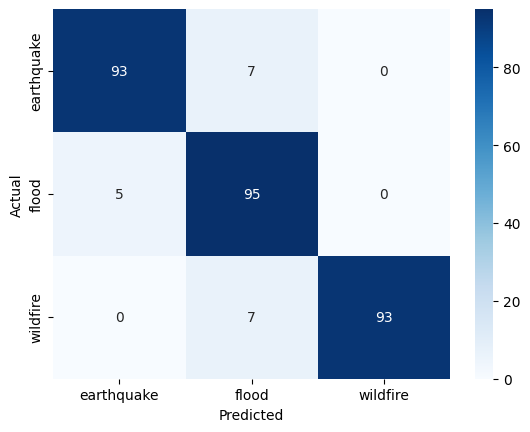

test accuracy: 93.66666666666667


In [ ]:
import pandas as pd
import seaborn as sn
import tensorflow as tf
model = tf.keras.models.load_model("disaster_resnet101(1).h5")
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True, fmt='d')
plt.show()
print('test accuracy: {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

# --- Assuming you have these set up ---
model_path = 'disaster_resnet101(2).h5'  # Replace with the path to your model
img_height, img_width = (224, 224)  # Replace if your model uses a different size
class_names = ['Earthquake', 'Flood', 'Wildfire']  # Adjust with your actual class names

# --- Load Model ---
model = load_model(model_path)

# --- Load and Preprocess a Single Image---
test_image_path = '20150515NEPAL-LENS-slide-AU2M-superJumbo.jpg'
img = image.load_img(test_image_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_preprocessed = preprocess_input(img_batch)  # Apply same preprocessing as training

# --- Make Prediction ---
prediction = model.predict(img_preprocessed)
predicted_class_index = np.argmax(prediction[0])
predicted_class_name = class_names[predicted_class_index]

print("Predicted Class:", predicted_class_name)



1/1 [==============================] - 2s 2s/step
Predicted Class: Wildfire
